# Исследование рынка игр
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

План работы:
1. Изучить данные 
2. Обработать данные
3. Провести исследовательский анализ данных в том числе выбрать актуальный период для прогноза, сформировать некоторые выводы относительно влияния рейтинга и отзывов и тд.
4. Сотавить портрет игрока каждого региона
5. Проверить гипотезы относительно равенства средних пользовательских рейтингов
6. Написать общий вывод

### Общая информация

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


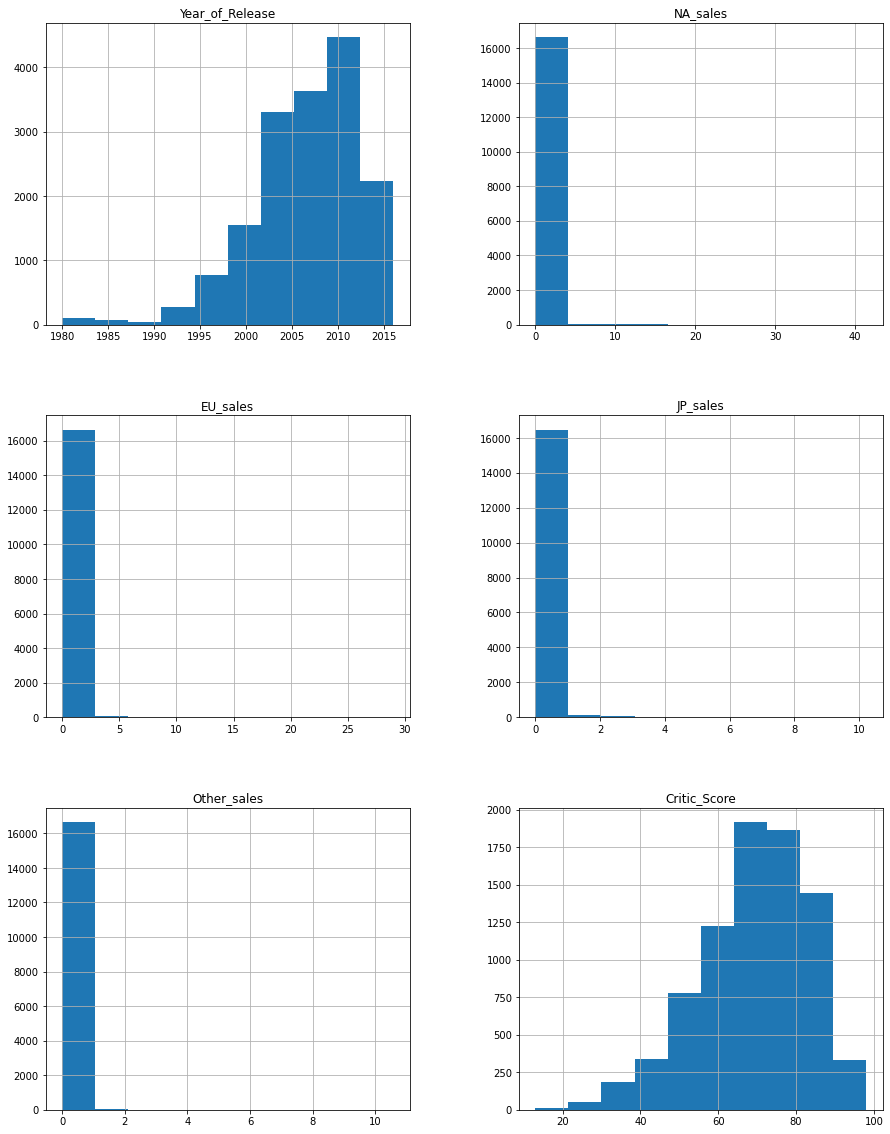

In [5]:
data.hist(figsize=(15, 20));

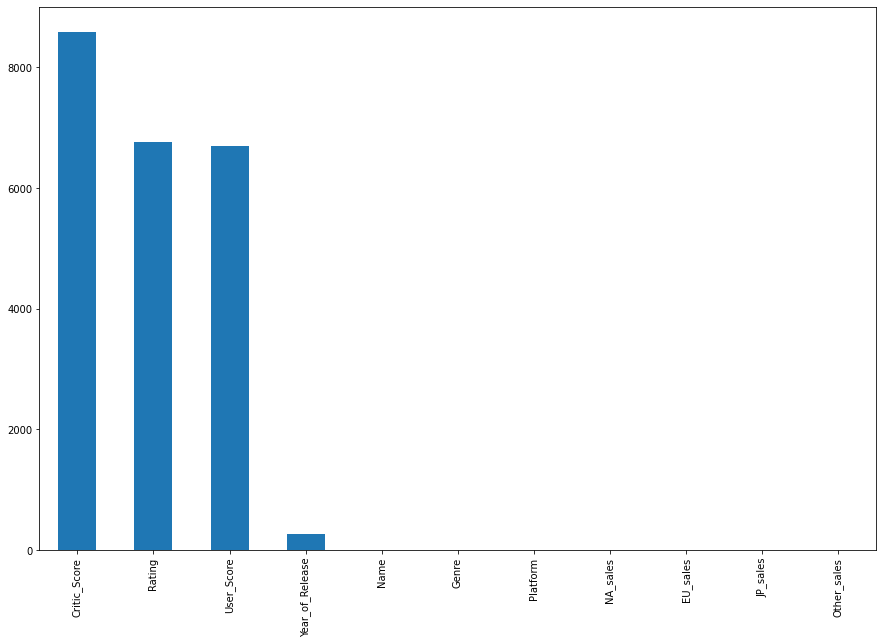

In [6]:
(data
    .isnull()
    .sum()
    .sort_values(ascending=False)
    .plot(kind='bar',figsize=(15, 10))
);

In [7]:
(data
    .isnull()
    .sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [8]:
data.duplicated().sum()

0

#### Вывод
Проблемы датасета:
1. Плохой нейминг столбцов
2. Ошибки типов данных(Year_of_Release   - дробное, User_Score - строка)
3. Аномалия tbd в User_Score
4. Много пропусков в столбцвх Year_of_Release, Critic_Score, User_Score и Rating.

### Предобработка данных

#### Названия столбцов

In [9]:
data = data.rename(columns=lambda x: x.lower())

In [10]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Пропуски в названии

In [11]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
data = data.dropna(subset=['name']).reset_index(drop=True)

#### Год выпуска (пропуски, тип данных)

In [13]:
data['year_of_release'].isna().sum()

269

In [14]:
data[(data['name']=='Tomb Raider (2013)') & (data['platform'] == 'PC')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5335,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.0,0.04,86.0,8.5,M


In [15]:
data.loc[5335, 'year_of_release'] = 2013


In [16]:
data.loc[15555]

name               Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)
platform                                                  Wii
year_of_release                                           NaN
genre                                                  Racing
na_sales                                                  0.0
eu_sales                                                  0.0
jp_sales                                                 0.02
other_sales                                               0.0
critic_score                                              NaN
user_score                                                NaN
rating                                                    NaN
Name: 15555, dtype: object

Можно заметить, что у некоторых игр можно восстановить год релиза по названию, так как спортивные симуляторы выпускают игры на следующий сезон. Например если FIFA Soccer 2004 значит она была выпущена в прошлом году. 

In [17]:
missing_year = data[data['year_of_release'].isna()]['name'].to_dict()
for s in missing_year:
    nums = re.findall(r'\d+', missing_year[s])
    missing_year[s] = nums
missing_year = dict(filter(lambda x:x[1], missing_year.items()))

In [18]:
for s in missing_year:
    if len(missing_year[s][0])==4:
        missing_year[s] = int(missing_year[s][0])-1
    elif (len(missing_year[s])==2) & (missing_year[s][0]=='2'):
         missing_year[s] = int(missing_year[s][0])*1000 + int(missing_year[s][1]) - 1
    elif  (missing_year[s][0]=='06') | (missing_year[s][0]=='07') | (missing_year[s][0]=='11'):
         missing_year[s] = int("20"+missing_year[s][0]) - 1
for key, value in missing_year.items():
    if type(value) != list:
        data.loc[key, 'year_of_release'] = value

In [19]:
data['year_of_release'].isna().sum()

245

In [20]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

Мой код работает следующим образом:
1. Образует словарь по типу индекс - список цифр встречающихся в названии
2. Удаляет пустые списки вместе с ключами из словаря
3. Преобразует необходимые оставшиеся цифры в года
4. Заполняет пропуски в датафрейме

Оставшиеся 245 значений можно было заполнить при помощи парсинга или вручную, но это трудоемко и является 1,4% датафрейма, поэтому их я просто удалил. 

In [21]:
data['year_of_release'] = data['year_of_release'].astype(int) 

Тип необходимо заменить, так как год - целое число.

#### Оценка пользователей

In [22]:
data['user_score'].value_counts()

tbd    2380
7.8     322
8       285
8.2     277
8.3     252
       ... 
0.3       2
1         2
0.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [23]:
data = data.replace('tbd', np.nan)

In [24]:
data['user_score'] = data['user_score'].astype(float) 

DEFINITION: “TBA” and “TBD” mean “to be announced” and “to be determined,” respectively. Значит пользователи пока не дали оценку этой игре. Заменил их на NaN. Заменил тип данных на float, так как рейтинг - дробное число.

#### Рейтинг

In [25]:
data['rating'] = data['rating'].fillna('unknown')

Пропуски заменим на специальную категорию.

#### Общие продажи

In [26]:
data['global_sales'] = (data['na_sales'] + 
                        data['eu_sales'] + 
                        data['jp_sales'] + 
                        data['other_sales'])
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


#### Вывод
Пропуски в столбцах name и genre это вероятно одна и та же игра вышедшая на разных рынках. Вероятно ошибка при выгрузке.

Пропуски в year_of_release случайны, возможно инфорации не было в источниках с которых брали данные 

Пропуски в Critic_Score, User_Score и Rating не случайны. Агенства могут не оценивать низкобюджетные и малоизвестные игры, то же самое со старыми играми. Из-за этого в большинстве случаев отсутсвуют оценки игроков или ESRB оценка.

Была проделана работа по предобработке:
1. Названия столбцов было приведено к нижнему регистру
2. Восстановлены некоторые пропуски в строках.
3. Добавлен столбец общих продаж.

### Исследовательский анализ данных

#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

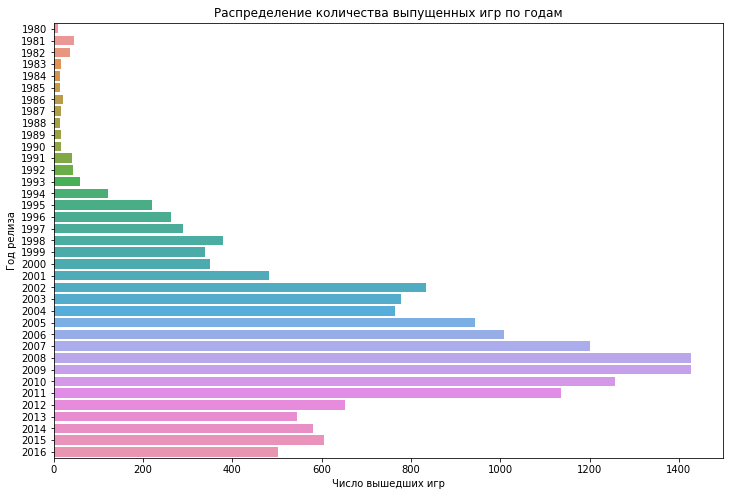

In [27]:
plt.figure(figsize=(12, 8))
games_per_year = (data
    .pivot_table(index = 'year_of_release', 
                 values = 'name', 
                 aggfunc ='count')
)
sns.barplot(data=games_per_year, 
            y=games_per_year.index, 
            x="name",
            orient='h',)

plt.ylabel('Год релиза')
plt.xlabel('Число вышедших игр')
plt.title('Распределение количества выпущенных игр по годам');

Очевидно, что нам не важны продажи за все время, так как индустрия пережила много изменений. Среди этих изменений смены поколейни консолей, выходы новых движков, создание игровых корпораций. Поэтому спад начиная с 2009 года можно объсянить тем, что корпорации стали тратить на игры намного больше ресурсов(как трудовых, так и денежных) на производство игровых продуктов, так как требования повышаются с каждым годом.

#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

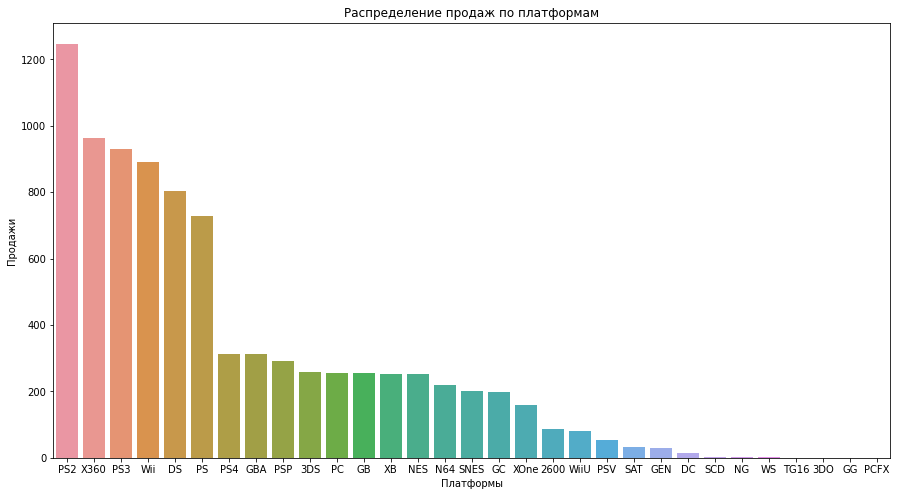

In [28]:
plt.figure(figsize=(15, 8))
sales_per_platform = (data
    .pivot_table(index = 'platform', 
                 values = 'global_sales', 
                 aggfunc ='sum')
    .sort_values(by = 'global_sales', 
                 ascending = False)
)
sns.barplot(data=sales_per_platform, 
            x=sales_per_platform.index, 
            y="global_sales",)

plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.title('Распределение продаж по платформам');

На графике очевидны лидеры - первые 6 платформ, захватившие лидерство по продажам. Однако мы изучим продажи первых 10 платформ, потому что можно сделать интересные выводы о том, какое время существует одно поколение платформы.

In [29]:
top10_platform = (data
    .pivot_table(index = 'platform', values = 'global_sales', aggfunc ='sum')
    .sort_values(by = 'global_sales', ascending = False)
    .head(10)
    .index
).to_list()

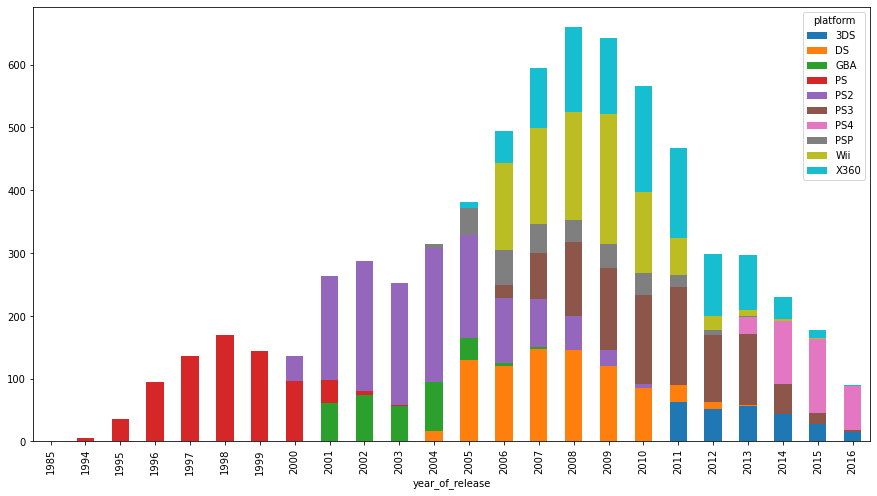

In [30]:
(data.query('platform in @top10_platform') 
    .pivot_table(index='year_of_release', columns='platform', values='global_sales', aggfunc='sum')
    .plot(kind='bar', stacked= True, figsize=(15, 8))
);


На данном графике видно, какую часть рынка занимали игры с определенной платформы в определенный год. по нему можно сделать следующие выводы:
* В среднем популярные платформы платформы живут 8 - 12 лет
* У компании Sony платформы выходят каждые 5-7 лет, а старые платформы поддерживаются еще примерно 3 года.
* Актуальным моно считать период с 2014 года, так как игры с новой PS4 занимает уже больший объем рынка чем у PS3 и с каждым годом доля PS4 растет.

#### Выделение данных за актуальный преиод

In [31]:
actual_data = data[data['year_of_release']>2013]
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16456,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16460,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16463,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16465,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [32]:
actual_data.pivot_table(index='year_of_release', 
                        columns='platform', 
                        values='global_sales', 
                        aggfunc='sum')

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


<AxesSubplot:xlabel='year_of_release'>

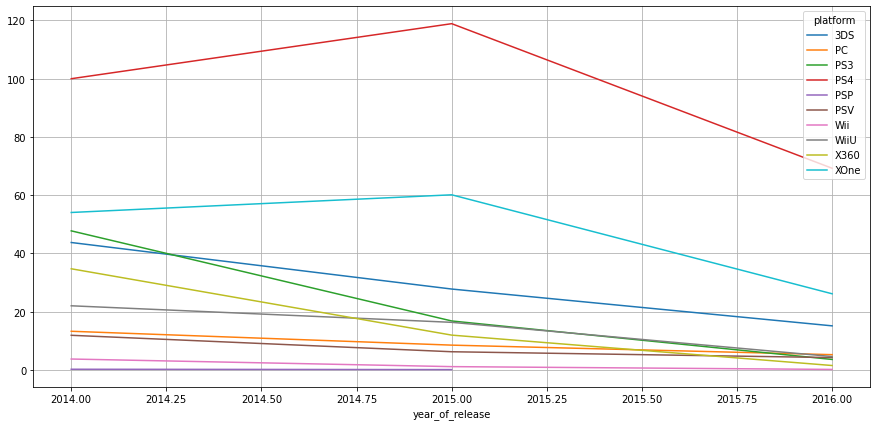

In [33]:
actual_data.pivot_table(index='year_of_release', 
                        columns='platform', 
                        values='global_sales', 
                        aggfunc='sum').plot(grid=True, figsize=(15, 7))

Выводы:
* У платформ нового поколения(PS4, XOne, 3DS, WiiU, PSV) продаж больше чем у их предыщего поколения(PS3, X360, DS, Wii и PSP)
* Продажи после 2015 года падают у всех платформ.

Перспективынми платформами я считаю **PS4 и XOne** так как это платформы нового поколения, которые будут поддерживаться еще много лет. Также перспективной я считаю **PC**, так как PC не подвержен смене поколений.

#### «Ящик с усами» по глобальным продажам игр в разбивке по платформам.

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,global_sales
count,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,718.000000,888.000000,1689.000000
mean,2014.953227,0.168182,0.160261,0.055115,0.048324,72.306407,6.623536,0.431883
std,0.799624,0.446134,0.466846,0.211513,0.141790,12.213500,1.589792,1.056109
min,2014.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.030000
50%,2015.000000,0.020000,0.020000,0.010000,0.010000,74.000000,7.000000,0.100000
75%,2016.000000,0.120000,0.120000,0.040000,0.040000,81.000000,7.800000,0.350000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.300000,14.630000


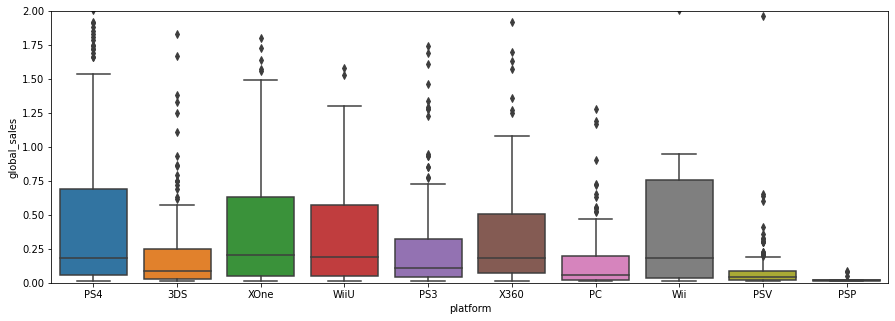

In [34]:
fig, ax = plt.subplots(figsize =(15,5))
sns.boxplot(x = 'platform', 
            y = 'global_sales',
            data = actual_data,).set(ylim=(0, 2))
actual_data.describe()

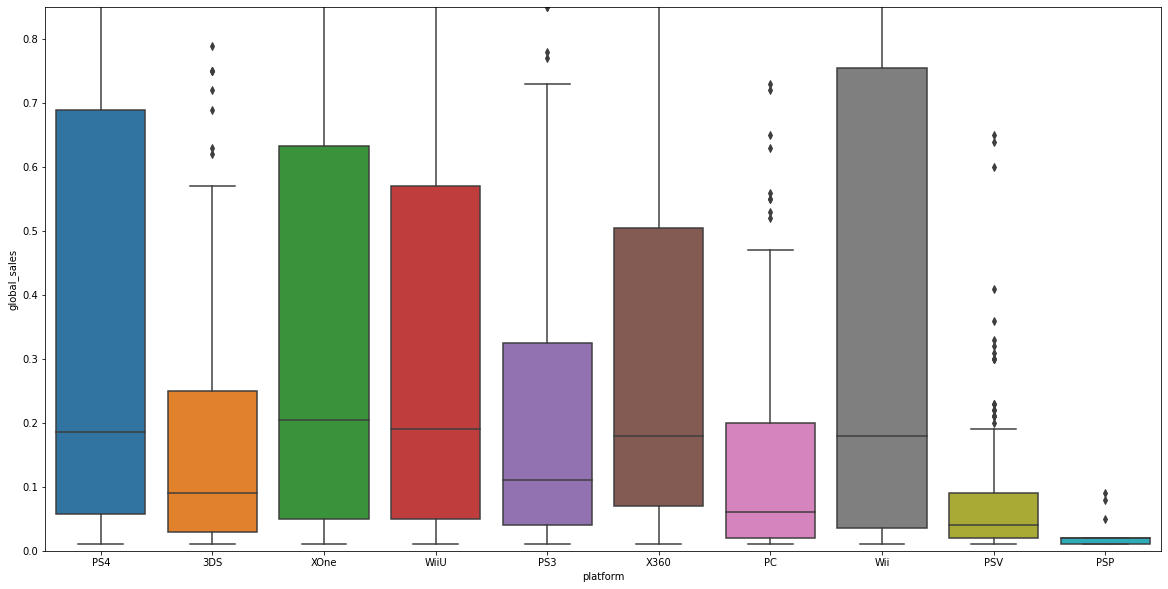

In [141]:
fig, ax = plt.subplots(figsize =(20,10))
sns.boxplot(x = 'platform', 
            y = 'global_sales',
            data = actual_data,).set(ylim=(0, 0.85));

По графику видно, что продажи неоднородны, встречаются игры которые продаются невероятно успешно и дают много прибыли, однако большая часть не преодолевает оценку в 400 тысяч копий.

* Среднее из-за выбросов равняется 431 тысяче копий.
* Максимум 14.6 миллионов копий(PS4).
* Медиана - 100 тысяч копий.

Наиболее успешные платформы: PS4, XOne, WiiU, X360, Wii.

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

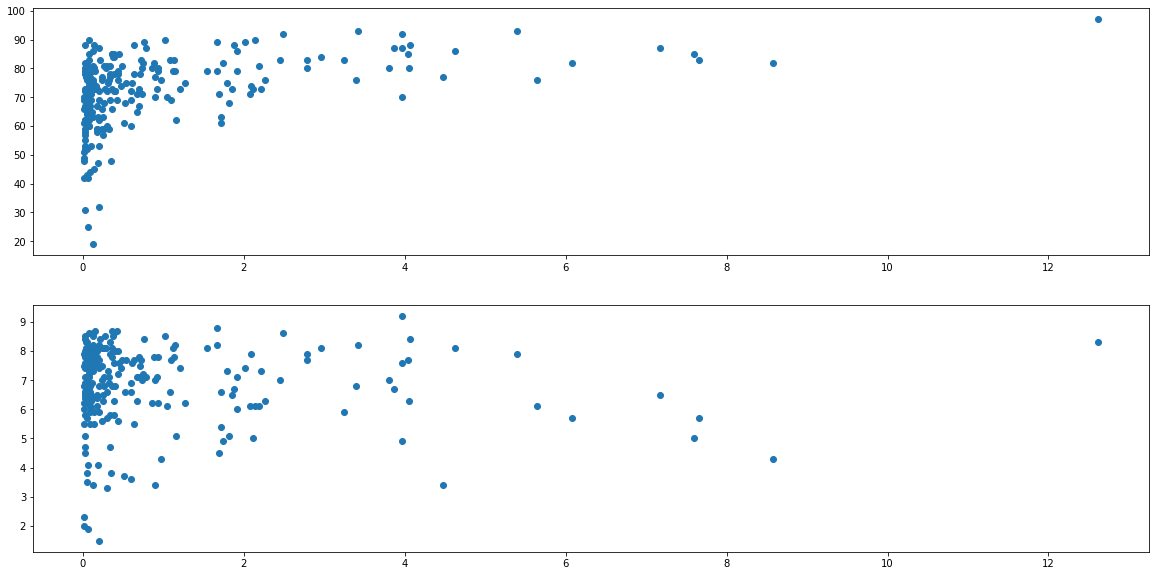

In [35]:
fig_scatter, (scatter_ax,scatter_ax2) = plt.subplots(2,1, figsize = (20,10))
scatter_ax.scatter(y= 'critic_score', x = 'global_sales',data =actual_data.query('platform == "PS4"').dropna());
scatter_ax2.scatter(y= 'user_score', x = 'global_sales',data =actual_data.query('platform == "PS4"').dropna());

In [36]:
(actual_data.query('platform == "PS4"')
    .loc[:,['global_sales', 'critic_score', 'user_score']]
    .corr()
)

,global_sales,critic_score,user_score
global_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


Видно, что на PS4 мнение критиков влияет на продажи, что видно по прямой корреляции, хоть и небольшой. 
Обратная корреляция для оценки игроков обратная и очень маленькая, соотвественно можно сделать вывод что оценки игроков не виляют на продажу игры.

Коэффициент корреляции между продажами и оценкой критикой свидетельствует о слабой прямой связи.
Оценки пользователей корреляции с продажами не имеют.

#### Соотнесите выводы с продажами игр на других платформах.

##### 3DS

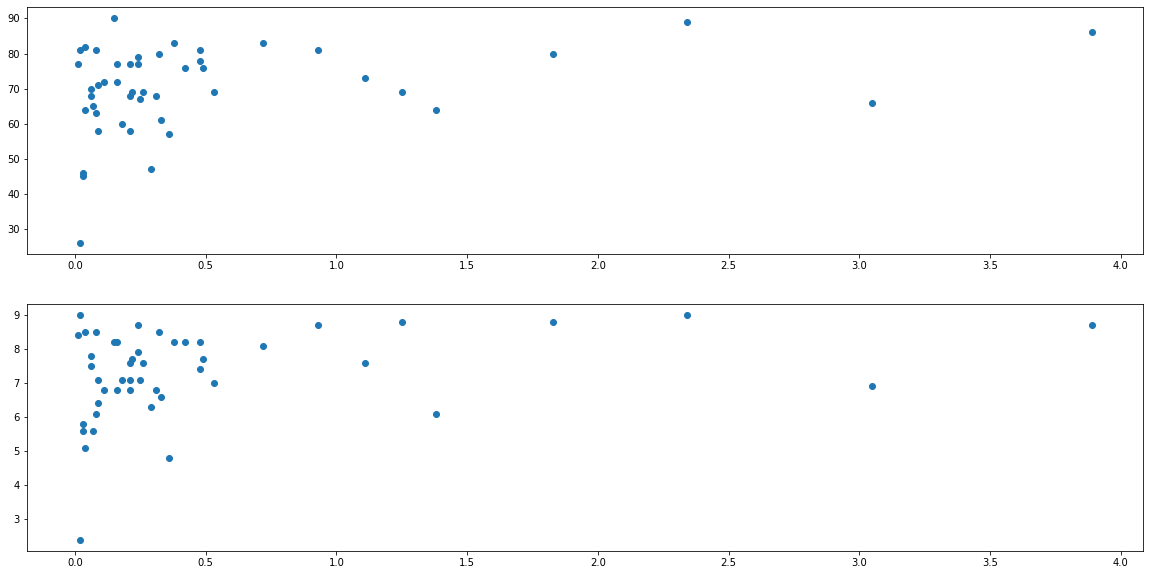

In [37]:
fig_scatter, (scatter_ax,scatter_ax2) = plt.subplots(2,1, figsize = (20,10))
scatter_ax.scatter(y= 'critic_score', x = 'global_sales',data =actual_data.query('platform == "3DS"').dropna());
scatter_ax2.scatter(y= 'user_score', x = 'global_sales',data =actual_data.query('platform == "3DS"').dropna());

In [38]:
(actual_data.query('platform == "3DS"')
    .loc[:,['global_sales', 'critic_score', 'user_score']]
    .corr()
)

,global_sales,critic_score,user_score
global_sales,1.000000,0.314117,0.215193
critic_score,0.314117,1.000000,0.862485
user_score,0.215193,0.862485,1.000000


Для 3DS подтвердился вывод об оценки критиков, но не подтвердился вывод об оценке игроков. На данной плтаформе присутсвтует слабая прямая корреляция медлу продажами и оценкой игроков

##### XOne

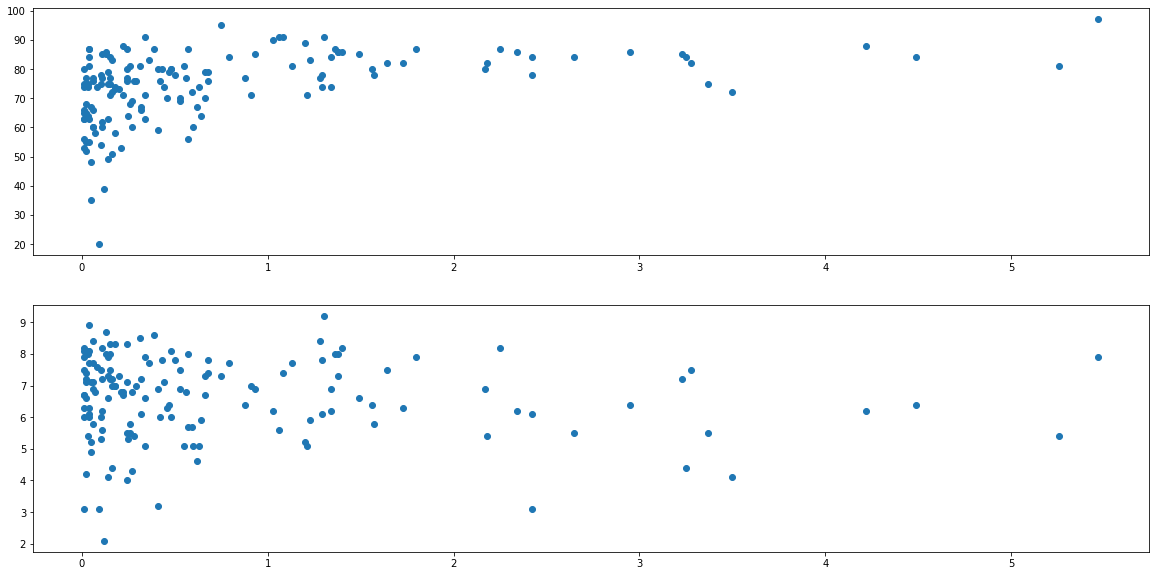

In [39]:
fig_scatter, (scatter_ax,scatter_ax2) = plt.subplots(2,1, figsize = (20,10))
scatter_ax.scatter(y= 'critic_score', x = 'global_sales',data =actual_data.query('platform == "XOne"').dropna());
scatter_ax2.scatter(y= 'user_score', x = 'global_sales',data =actual_data.query('platform == "XOne"').dropna());

In [40]:
(actual_data.query('platform == "XOne"')
    .loc[:,['global_sales', 'critic_score', 'user_score']]
    .corr()
)

,global_sales,critic_score,user_score
global_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


Для XOne подтвердились оба вывода.

##### WiiU

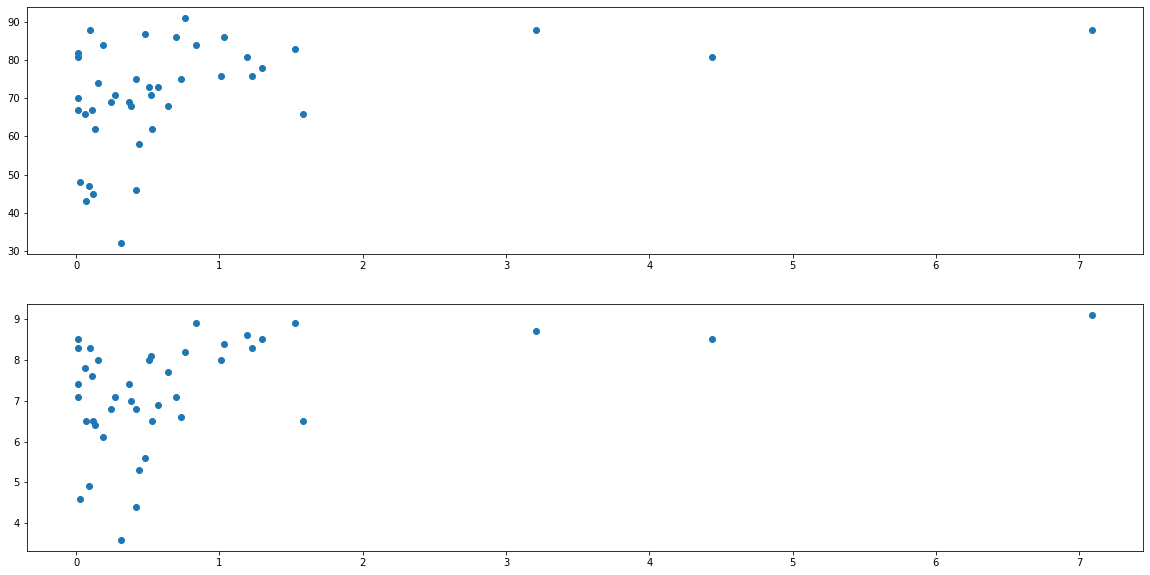

In [41]:
fig_scatter, (scatter_ax,scatter_ax2) = plt.subplots(2,1, figsize = (20,10))
scatter_ax.scatter(y= 'critic_score', x = 'global_sales',data =actual_data.query('platform == "WiiU"').dropna());
scatter_ax2.scatter(y= 'user_score', x = 'global_sales',data =actual_data.query('platform == "WiiU"').dropna());

In [42]:
(actual_data.query('platform == "WiiU"')
    .loc[:,['global_sales', 'critic_score', 'user_score']]
    .corr()
)

,global_sales,critic_score,user_score
global_sales,1.000000,0.370201,0.407926
critic_score,0.370201,1.000000,0.763536
user_score,0.407926,0.763536,1.000000


Для WiiU подтвердился вывод об оценке критиков, но не подтвердился об оценке игроков, так тут присутсвует  прямая корреляция с коэффицентом 0.4

##### PS3

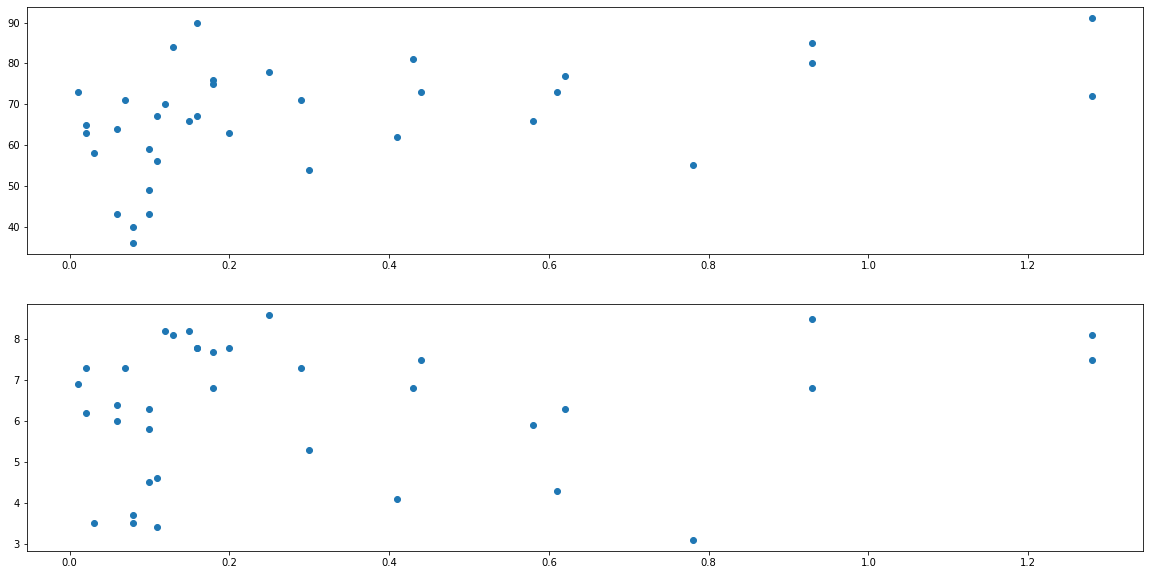

In [43]:
fig_scatter, (scatter_ax,scatter_ax2) = plt.subplots(2,1, figsize = (20,10))
scatter_ax.scatter(y= 'critic_score', x = 'global_sales',data =actual_data.query('platform == "PS3"').dropna());
scatter_ax2.scatter(y= 'user_score', x = 'global_sales',data =actual_data.query('platform == "PS3"').dropna());

In [44]:
(actual_data.query('platform == "PS3"')
    .loc[:,['global_sales', 'critic_score', 'user_score']]
    .corr()
)

,global_sales,critic_score,user_score
global_sales,1.000000,0.446575,-0.166761
critic_score,0.446575,1.000000,0.693445
user_score,-0.166761,0.693445,1.000000


Для PS3 подтвердились оба вывода.

##### X360

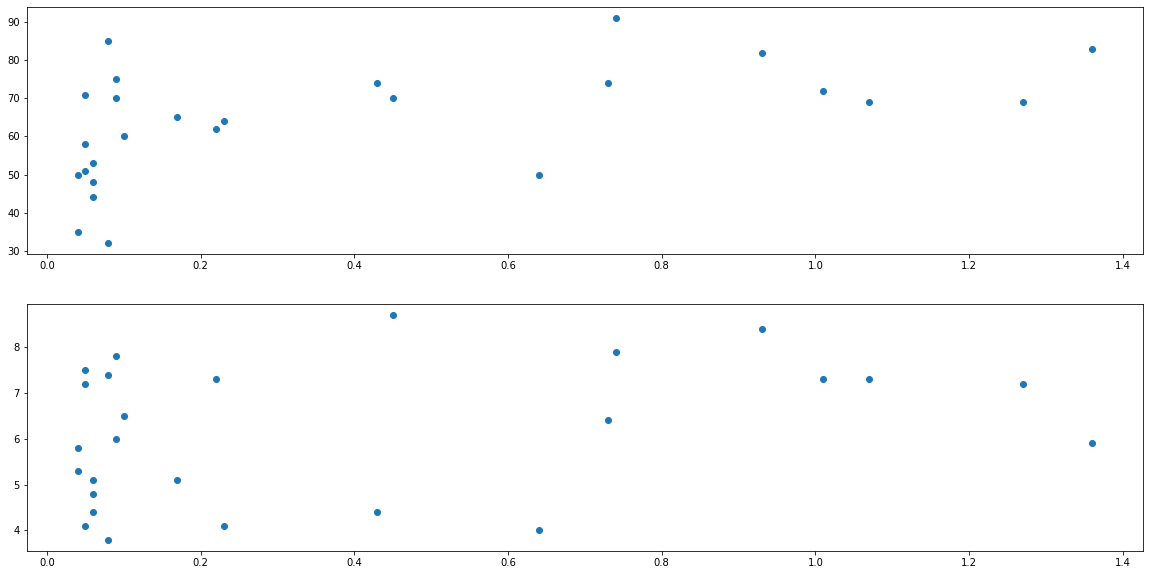

In [45]:
fig_scatter, (scatter_ax,scatter_ax2) = plt.subplots(2,1, figsize = (20,10))
scatter_ax.scatter(y= 'critic_score', x = 'global_sales',data =actual_data.query('platform == "X360"').dropna());
scatter_ax2.scatter(y= 'user_score', x = 'global_sales',data =actual_data.query('platform == "X360"').dropna());

In [46]:
(actual_data.query('platform == "X360"')
    .loc[:,['global_sales', 'critic_score', 'user_score']]
    .corr()
)

,global_sales,critic_score,user_score
global_sales,1.000000,0.525723,-0.138445
critic_score,0.525723,1.000000,0.625309
user_score,-0.138445,0.625309,1.000000


Для X360 подтвердились оба вывода.

##### PC

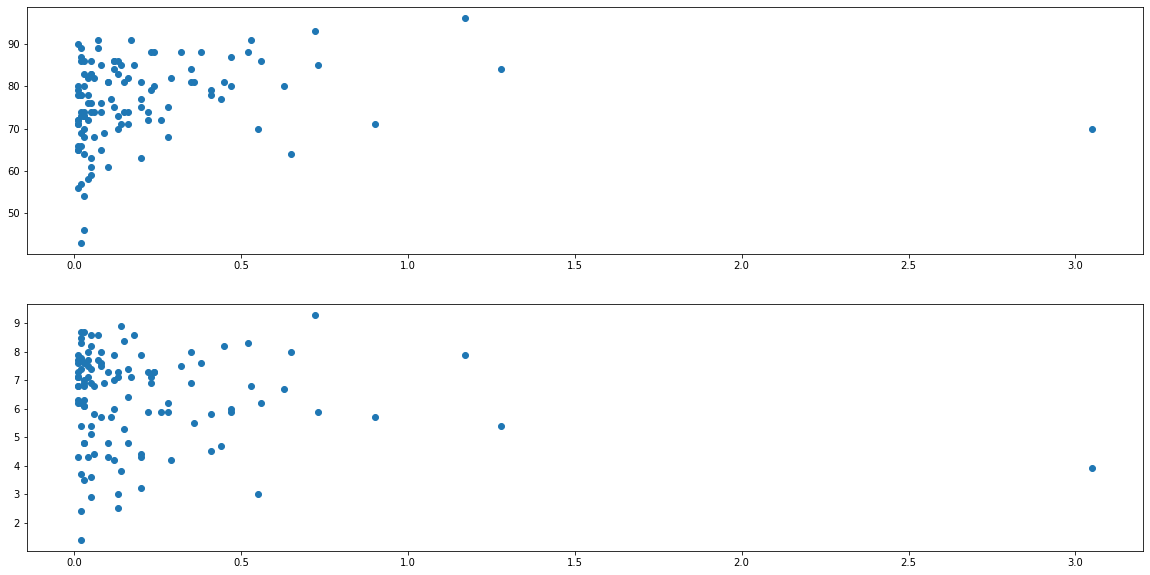

In [47]:
fig_scatter, (scatter_ax,scatter_ax2) = plt.subplots(2,1, figsize = (20,10))
scatter_ax.scatter(y= 'critic_score', x = 'global_sales',data =actual_data.query('platform == "PC"').dropna());
scatter_ax2.scatter(y= 'user_score', x = 'global_sales',data =actual_data.query('platform == "PC"').dropna());

In [48]:
(actual_data.query('platform == "PC"')
    .loc[:,['global_sales', 'critic_score', 'user_score']]
    .corr()
)

,global_sales,critic_score,user_score
global_sales,1.000000,0.174634,-0.071597
critic_score,0.174634,1.000000,0.466099
user_score,-0.071597,0.466099,1.000000


Для PC подтвердились оба вывода.

* PC, X360, PS3, XОne похожи на PS4
* У WiiU и 3DS оценки игроков влияют на продажи, у WiiU даже сильнее чем оценки критиков

У WiiU и 3DS коэффицент корреляции свидетельствует о том, что есть слабая прямая связь между оценками игроков и продажами, при чем у WiiU коэффицент больше чем между оценками критиков и продажами.

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

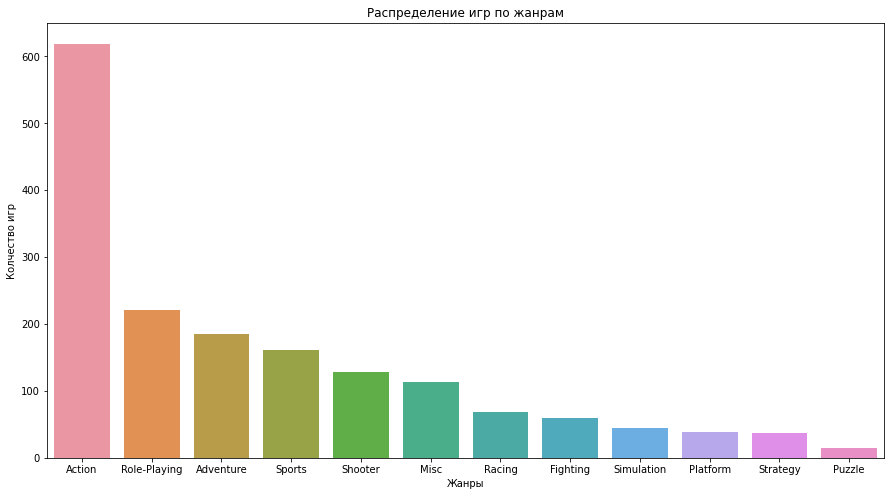

In [49]:
plt.figure(figsize=(15, 8))
genres = (actual_data
    .pivot_table(index = 'genre', 
                 values = 'global_sales', 
                 aggfunc ='count')
    .sort_values(by = 'global_sales', 
                 ascending = False)
)
sns.barplot(data=genres, 
            x=genres.index, 
            y="global_sales",)

plt.ylabel('Колчество игр')
plt.xlabel('Жанры')
plt.title('Распределение игр по жанрам');

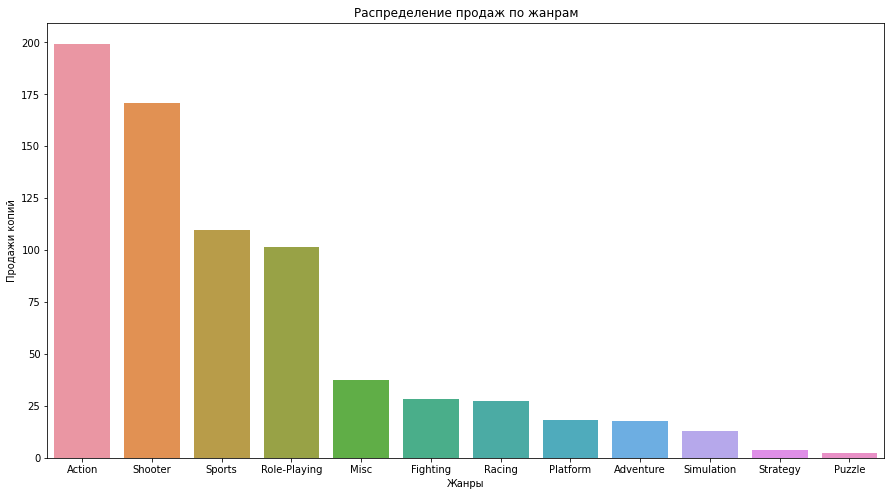

In [50]:
plt.figure(figsize=(15, 8))
genres = (actual_data
    .pivot_table(index = 'genre', 
                 values = 'global_sales', 
                 aggfunc ='sum')
    .sort_values(by = 'global_sales', 
                 ascending = False)
)
sns.barplot(data=genres, 
            x=genres.index, 
            y="global_sales",)

plt.ylabel('Продажи копий')
plt.xlabel('Жанры')
plt.title('Распределение продаж по жанрам');

Самые прибыльные жанры это экшны, шутеры и спортивные симуляторы. Экшены популярны потому что большинство громких релизов выходит именно в этом жанре. популярность шутеров и спорртивных симуляторов обусловлена мультиплеером или кооперативом, когда нескольо люедй играют одновременно. Также влияет соревновательный момент. Самыми неприбыльными и малопродаваемыми являются стратегии и пазлы, растерявшие свою актулаьность с 90х годов. Сегодняшних игроков тяжело завлечь загадками и интеллектуальными испытаниями.

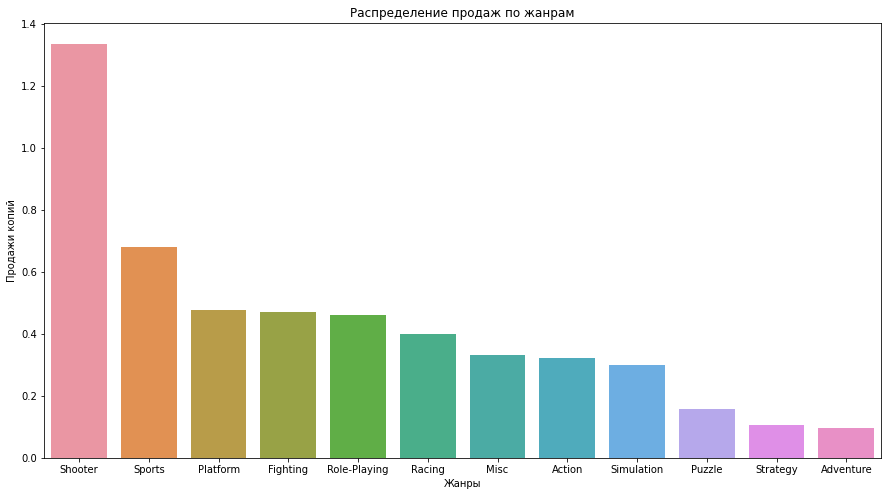

In [128]:
plt.figure(figsize=(15, 8))
genres = (actual_data
    .pivot_table(index = 'genre', 
                 values = 'global_sales', 
                 aggfunc ='mean')
    .sort_values(by = 'global_sales', 
                 ascending = False)
)
sns.barplot(data=genres, 
            x=genres.index, 
            y="global_sales",)

plt.ylabel('Продажи копий')
plt.xlabel('Жанры')
plt.title('Распределение продаж по жанрам');

In [139]:
genres = (actual_data
    .pivot_table(index = 'genre', 
                 values = 'global_sales', 
                 aggfunc ={'global_sales': ['count', 'sum', 'mean']}))
genres

,count,mean,sum
genre,,,
Action,619,0.322068,199.36
Adventure,185,0.094865,17.55
Fighting,60,0.470333,28.22
Misc,113,0.332301,37.55
Platform,38,0.476053,18.09
Puzzle,14,0.157857,2.21
Racing,69,0.398841,27.52
Role-Playing,221,0.459005,101.44
Shooter,128,1.335469,170.94


После проведения исследования по медиане стало ясно, что игры в жанре шутер в среднем становятся более успешными и продаются лучше, чем другие жанры. Поэтому можно сказать что по нашим данным самым прибыльным жанром является шутер.

#### Вывод
Был проведен исследовательский анализ данных, приведены выводы подтвежденные фактами 

На 2017 год ожидается подъем продаж по PS4 и XOne, так как это последнее поколение самых популярных игровых платформ.

 ### Портрет пользователя каждого региона

 #### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [51]:
platform_pivot_table = actual_data.pivot_table(index = 'platform', 
                                              values = ['na_sales','jp_sales','eu_sales'], 
                                              aggfunc = ['sum'])
platform_pivot_table.columns = ['na_sales','jp_sales','eu_sales']
platform_pivot_table

,na_sales,jp_sales,eu_sales
platform,,,
3DS,16.12,44.24,22.64
PC,17.97,0.00,7.23
PS3,25.54,11.22,22.05
PS4,130.04,15.02,98.61
PSP,0.00,0.36,0.00
PSV,3.53,14.54,2.52
Wii,2.59,0.00,2.08
WiiU,13.15,7.31,19.36
X360,15.49,0.08,28.30


In [52]:
top5_eu = (platform_pivot_table['eu_sales'].sort_values(ascending = False)
           .head())
top5_jp = (platform_pivot_table['jp_sales'].sort_values(ascending = False)
           .head())
top5_na = (platform_pivot_table['na_sales'].sort_values(ascending = False)
           .head())
top5_eu

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: eu_sales, dtype: float64

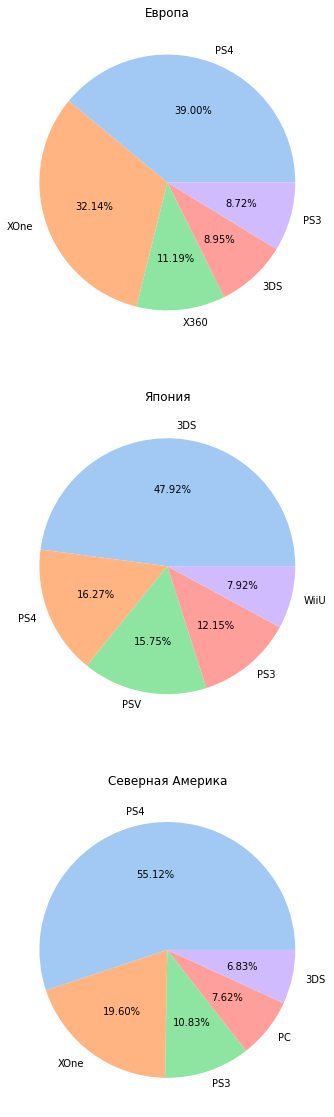

In [53]:
fig_pie, (plt1,plt2,plt3) = plt.subplots(3,1, figsize = (20,20))
colors = sns.color_palette('pastel')[0:5]

plt1.pie(top5_eu, labels = top5_eu.index, colors = colors, autopct='%.2f%%',);
plt2.pie(top5_jp, labels = top5_jp.index, colors = colors, autopct='%.2f%%',);
plt3.pie(top5_na, labels = top5_na.index, colors = colors, autopct='%.2f%%',);
plt1.set_title('Европа');
plt2.set_title('Япония');
plt3.set_title('Северная Америка');

Рейтинг платформ:

* Топ 5 по Европе: PS4, XOne, X360, 3DS и PS3
* Топ 5 по Японии: 3DS, PS4, PSV, PS3 и WiiU
* Топ 5 по Северной Америке: PS4, XOne, PS3, PC и 3DS



 #### Самые популярные жанры (топ-5). Поясните разницу.

In [54]:
genre_pivot_table = actual_data.pivot_table(index = 'genre', 
                                              values = ['na_sales','jp_sales','eu_sales'], 
                                              aggfunc = ['sum'])
genre_pivot_table.columns = ['na_sales','jp_sales','eu_sales']
platform_pivot_table

,na_sales,jp_sales,eu_sales
platform,,,
3DS,16.12,44.24,22.64
PC,17.97,0.00,7.23
PS3,25.54,11.22,22.05
PS4,130.04,15.02,98.61
PSP,0.00,0.36,0.00
PSV,3.53,14.54,2.52
Wii,2.59,0.00,2.08
WiiU,13.15,7.31,19.36
X360,15.49,0.08,28.30


In [55]:
top5_eu = (genre_pivot_table['eu_sales'].sort_values(ascending = False)
           .head())
top5_jp = (genre_pivot_table['jp_sales'].sort_values(ascending = False)
           .head())
top5_na = (genre_pivot_table['na_sales'].sort_values(ascending = False)
           .head())
top5_eu.index

Index(['Shooter', 'Action', 'Sports', 'Role-Playing', 'Misc'], dtype='object', name='genre')

In [56]:
print('Самые популярные жанры в Европе:', ', '.join(top5_eu.index))
print('Самые популярные жанры в Японии:', ', '.join(top5_jp.index))
print('Самые популярные жанры в Северной Америке:', ', '.join(top5_na.index))

Самые популярные жанры в Европе: Shooter, Action, Sports, Role-Playing, Misc
Самые популярные жанры в Японии: Role-Playing, Action, Fighting, Misc, Shooter
Самые популярные жанры в Северной Америке: Action, Shooter, Sports, Role-Playing, Racing


Европейские игроки и Американцы очень похожи по любимым жанрам, но сильно отличаются от Японцев. В Японии на популярность файтингов и рпг сильно повлияли локальные разработчики(японские рпг обычно выделяют в отдельный жанр JRPG). Также на популярность файтингов повлияли старые аркадные автоматы. Однако любовь к экшену объединяет игроков со всех стран.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [57]:
(actual_data.pivot_table(index = ['rating'], 
                         values = ['na_sales','jp_sales','eu_sales'], 
                        aggfunc = ['sum']))

sum                  
        eu_sales jp_sales na_sales
rating                            
E          58.06     8.94    50.74
E10+       26.16     4.46    33.23
M          93.44     8.01    96.42
T          34.07    14.78    38.95
unknown    58.95    56.90    64.72

На рынке Европы и Северной Америке лидируют игры с рейтингом М(17+), а в Японии Т(13+). Значит Рынок Европы и Америки ориентирован на сзрослую аудиторию, а Японии на подростков.

#### Вывод
* Американский игрок и Европейский игрок - от 17 лет, любит играть или на PS4, или на XOne, любит экшены и шутеры. 
* Японский игрок - от 13 лет, любит играть на 3DS или PS4, любит играть в RPG и экшены.

 ### Проверка гипотез

 ####  Гипотеза 1
 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
 
Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1 : Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [58]:
xone = actual_data.query('platform == "XOne"')['user_score'].dropna()
pc = actual_data.query('platform == "PC"')['user_score'].dropna()
print(len(xone),len(pc))

165 122


Объем отличается достаточно сильно. Нет оснований полагать, что дисперсии одинаковы.

In [59]:
alpha = 0.05

results = st.ttest_ind(
    xone, 
    pc,
    equal_var = False )

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


**Вывод:** У нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются

 ####  Гипотеза 2
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Н0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

H1 : Средние пользовательские рейтинги жанров Action и Sports отличаются

In [60]:
action = actual_data.query('genre == "Action"')['user_score'].dropna()
sport = actual_data.query('genre == "Sports"')['user_score'].dropna()
print(len(action),len(sport))

297 127


Объемы отличаются достаточно сильно. Нет оснований полагать, что дисперсии одинаковы.

In [61]:
alpha = 0.05

results = st.ttest_ind(
    action, 
    sport,  
    equal_var = False )

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод:** У нас есть основания утверждать, что средние пользовательские рейтинги жанров Action и Sports отличаются.

 ####  Вывод
* Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые не отвергается 
* Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые отвергается 

В обоих случаях проверялась гипотеза о равенстве средних двух генеральных совокупностей, поэтому в обоих случаях применялся t-тест

 ### Общий вывод

В ходе проделанной работы было выполнено:

1. Изучен датасет, выявлены аномалии и пропущенные значения.
2. Проведена предобработка датасета: замена названий столбцов, заполнение пропускови т.д.
3. Проведен анализ по данным и подготовлены актуальные данные.
4. Составлены портреты пользователей для 3 регионов.
5. Выполнены проверки гипотез.

Сводный анализ для кампании на 2017 год.

1. Продавать игры на новые поколения популярных платформ PS4, XOne.
2. Продавать популярные жанры - экшен, шутеры, спортивные и ролевые игры.
3. Изучить свою аудиторию, т.к. большинство игр рассчитано на игроков, которым 17 лет и старше.
4. Помимо популярных платформ всегда будут продаваться игры на PC, т.к. он мало подвержен изменениям ны рынке консолей.
5. Продавать то что нужно аудитории в вашем регионе.

Для проведения реколамной кампании в 2017 году я рекомендую обртаить внимание на следующие моменты:
* Выбор платформы. В следующем году самыми популярными платформами будут консоли нового поколения PS4 и Xbox One. В Японии также необходимо продвигать игры для 3DS, т. к. в этом регионе она вне конкуренции.


* Среди жанров стоит обратить на следующие: Action, Shooter, Sports. Однако стоит заметить, что самым прибыльным среди них является шутер. Также стоит обртаить внимание на региональную специфику рынка Японии, там популярны Role-Playing, Action, Fighting.


* Для PS4 и Xbox One стоит обращать внимания на отзывы критики, т. к. есть прямая зависимость между этим параметром и объемом продаж. Для WiiU и 3DS также стоит обратить внимание на отзывы критиков.


* Возрастные рейтинги самых популярных игр - M(17+), E(6+), E10(10+) и T(13+). На японском рынке, бóльшая часть всех игр (56%) продается без указания возрастного рейтинга ESRB. Это связано с тем, что у них есть свое агенство, присваивающее рейтинги играм CERO.
